### A demo to compare the image before and after transformation

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

In [2]:
# Load image
image_path = "data/train/nevus/ISIC_0000019.jpg" # or wherever your test image is located
original_image = Image.open(image_path)

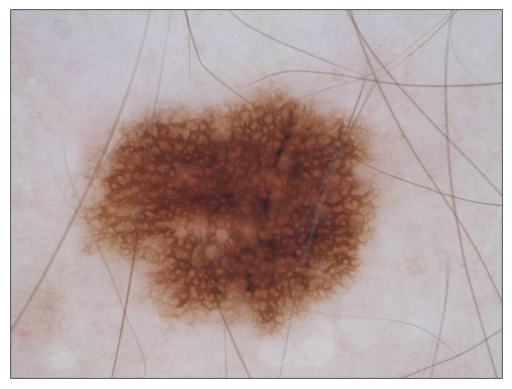

In [6]:
''' Don't forget to invert image by right-click '''
# Show the original image
plt.imshow(original_image, cmap=None)
plt.axis("off")
plt.show()

### Transformation Test Ground

In [4]:
# https://pytorch.org/vision/0.9/transforms.html
# Define the transformation rules
transform = transforms.Compose([
    #transforms.RandomRotation(degrees=6),
    #transforms.RandomResizedCrop(size=224),
    #transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) # ImageNet1K stats
])

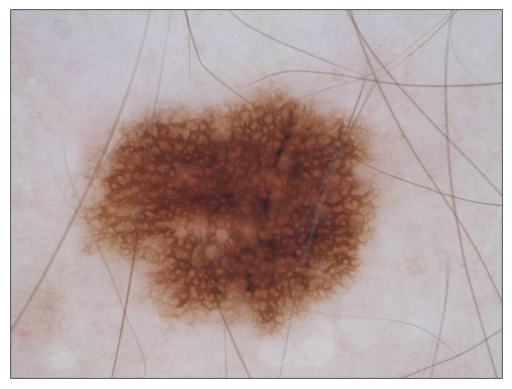

In [5]:
transformed_image = transform(original_image)
transformed_image = transforms.ToPILImage()(transformed_image)
plt.imshow(transformed_image, cmap=None)
plt.axis("off")
plt.show()